### import packages

In [120]:
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

### load datasets

In [139]:
def load_dataset():
    diabetes = datasets.load_diabetes()
    X = diabetes.data
    y = diabetes.target
    return X, X_single_dim, y

### prepare training dataset

In [143]:
X, y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(353, 10)

### training with Regressor

In [144]:
linear_regressor = linear_model.LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto')

In [145]:
linear_regressor.fit(X=X_train, y=y_train)
knn_regressor.fit(X=X_train, y=y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

### testing

In [146]:
linear_y_pred = linear_regressor.predict(X=X_test)
linear_y_pred

array([169.60570616, 174.60304558, 166.5755833 , 120.9811582 ,
       150.98374432, 126.05982227, 137.67522639, 149.90804736,
       145.51924565,  65.89199739, 102.4886708 , 144.95696407,
       206.23405435, 239.09473051, 159.20424686, 100.63175465,
       176.54683487,  24.86204875, 138.184553  , 136.44174801,
       159.92209755, 214.4270921 , 134.93558462,  95.21625854,
        80.49423435,  51.3039241 , 257.18644562, 236.90829979,
       109.80536976, 154.61115977, 252.9692254 , 282.94853607,
       278.49704475, 165.09844464,  89.68299518, 116.64426912,
        78.97426977, 112.82494135, 205.89479275, 107.56237202,
        68.57724042, 184.07418472, 175.33992847, 122.15695288,
       157.31906071,  97.86401607, 226.17491966,  63.54425781,
       115.35335426, 213.0664163 ,  26.21200411, 153.92903107,
       135.39407816,  99.72436387, 171.74863483, 168.13609522,
       193.51939098,  52.11129143,  76.02658251, 221.52473715,
       113.65047694,  90.62088086, 253.25472339,  57.86

In [147]:
knn_y_pred = knn_regressor.predict(X=X_test)
knn_y_pred

array([178.7, 211. , 161.7, 148. , 146.9, 115.8, 130.4, 156.6, 122.7,
        89.2, 111.5, 124.2, 197.7, 208.2, 183. , 104.4, 169.4,  71. ,
        94.9, 166. , 141.4, 183.5, 155.2, 117.4,  89.1,  83.2, 251. ,
       205.5, 117. , 112.3, 274.2, 248.4, 246.3, 172.9,  91.5,  99.8,
        79.1, 111. , 203.6, 137.2,  95.4, 181.7, 141.3, 110.8, 153.5,
        82.9, 210. ,  76. , 106. , 178.8,  83.2, 157.9, 146.4, 103.5,
       159.7, 184.7, 138.5,  82.6, 119.1, 195.1, 109.5,  85. , 206.7,
        74.3, 160.5,  88. , 198.1, 166.2, 202.5, 254.8,  84.1,  82.9,
       139.5, 158.2, 158.3, 127.7, 207.6, 130.1, 156.4, 114.2, 148.7,
       166. , 124. , 134.4, 188.5,  91.8,  68. , 243.5,  98.4])

In [148]:
np.sum(np.sqrt(np.square(np.abs(y_test - linear_y_pred))))/len(y_test), np.sum(np.sqrt(np.square(np.abs(y_test - knn_y_pred))))/len(y_test)

(42.76007500080522, 41.67303370786517)

In [149]:
linear_mse_log = mean_squared_log_error(y_true=y_test, y_pred=linear_y_pred)
knn_mse_log = mean_squared_log_error(y_true=y_test, y_pred=knn_y_pred)

In [ ]:
def plot_result(X, y):
    plt.figure(figsize=(8,8))
    cmap = plt.get_cmap('viridis')
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X_test, linear_y_pred, color='black', linewidth=2, label="Prediction")
    plt.plot(X, ky, color='blue', linewidth=0.1, label="Prediction")
    plt.suptitle("Linear and knn_regressor Regression")
    plt.title("Linear MSE Log: {0:.7g}\n KNN MSE Log: {0:.7g}".format(linear_mse_log, knn_mse_log), fontsize=10)
    plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
    plt.show()

In [152]:
def extract_single_sim(X, dim = 2):
    X_single_dim = X[:, np.newaxis, dim]
    return X_single_dim

In [157]:
X_tr = extract_single_sim(X_train)
X_t = extract_single_sim(X_test)
ly = linear_regressor.predict(X=X_t)

ValueError: shapes (89,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

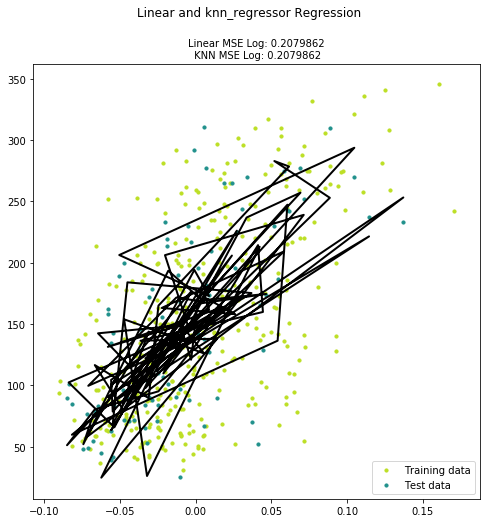

In [156]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('viridis')

m1 = plt.scatter(X_tr, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_t, y_test, color=cmap(0.5), s=10)
plt.plot(X_t, ly, color='black', linewidth=2, label="Prediction")
#plt.plot(X_s, ky, color='blue', linewidth=0.1, label="Prediction")
plt.suptitle("Linear and knn_regressor Regression")
plt.title("Linear MSE Log: {0:.7g}\n KNN MSE Log: {0:.7g}".format(linear_mse_log, knn_mse_log), fontsize=10)
plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()